# **CHALLENGE 2 - Challenge Telecom X: análisis de evasión de clientes**

# **1. EXTRACCIÓN DE DATOS**

**✅ Cargar los datos directamente desde la API utilizando Python.**

In [19]:
import pandas as pd

In [20]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df = pd.read_json(url)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Utilización del raw

“Los datos fueron extraídos directamente desde una fuente remota (API), utilizando un endpoint HTTP que retorna la información en formato JSON.” raw sirve para obtener el contenido puro del archivo, sin la interfaz HTML de GitHub.

Eso aplica para:

.json

.csv

.txt

.md

.xml

incluso .py

In [21]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

**✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.**

In [22]:
df = pd.read_json(url)
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# 2. Transformación (T - Transform)

**2.1 Conoce el conjunto de datos**



**✅ Explorar las columnas del dataset y verificar sus tipos de datos.**

In [23]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

El dataset contiene 7267 registros y 6 columnas. Se exploraron los nombres de las columnas y se verificaron los tipos de datos utilizando los métodos columns e info() de Pandas. Todas las variables se encuentran inicialmente con tipo de dato object y no se identificaron valores nulos.

**✅ Consultar el diccionario para comprender mejor el significado de las variables.**

Se consultó el diccionario de datos proporcionado para comprender el significado de las variables del dataset. A continuación, se resumen las principales columnas:

customerID: identificador único de cada cliente.

Churn: indica si el cliente dejó o no la empresa.

gender: género del cliente (masculino o femenino).

SeniorCitizen: indica si el cliente tiene 65 años o más.

Partner: indica si el cliente tiene pareja.

Dependents: indica si el cliente tiene dependientes.

tenure: número de meses que el cliente ha permanecido con la empresa.

PhoneService: indica si el cliente cuenta con servicio telefónico.

MultipleLines: indica si el cliente tiene más de una línea telefónica.

InternetService: proveedor del servicio de internet.

OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport: servicios adicionales contratados.

StreamingTV, StreamingMovies: servicios de entretenimiento.

Contract: tipo de contrato del cliente.

PaperlessBilling: indica si recibe facturación electrónica.

PaymentMethod: método de pago.

Charges.Monthly: cargos mensuales del cliente.

Charges.Total: total facturado al cliente.

Este diccionario permite interpretar correctamente las variables antes de realizar transformaciones y análisis.

**✅ Identificar las columnas más relevantes para el análisis de evasión.**

Las columnas más relevantes para el análisis de evasión son aquellas relacionadas con el estado del cliente, su antigüedad, los servicios contratados y las condiciones de pago, ya que estos factores suelen influir directamente en la decisión de un cliente de abandonar la empresa.

**2.2 Comprobación de incoherencias en los datos**

Valores ausentes

In [24]:
# Cantidad de valores nulos por columna
print(df.isnull().sum())

# Opcional: porcentaje de valores nulos
print(df.isnull().mean() * 100)


customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64
customerID    0.0
Churn         0.0
customer      0.0
phone         0.0
internet      0.0
account       0.0
dtype: float64


Duplicados

In [25]:
# 1️⃣ Identificar columnas problemáticas (diccionarios u otros tipos no hashables)
columnas_problematicas = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, dict)).any()]

# 2️⃣ Columnas a usar para detectar duplicados
columnas_clave = [col for col in df.columns if col not in columnas_problematicas]

# 3️⃣ Convertir temporalmente a string para evitar errores de tipo
df_temp = df[columnas_clave].copy()
for col in df_temp.columns:
    df_temp[col] = df_temp[col].apply(lambda x: str(x) if isinstance(x, dict) else x)

# 4️⃣ Contar cuántas veces aparece cada combinación
duplicados_resumen = df_temp.groupby(columnas_clave).size().reset_index(name='Cantidad')

# 5️⃣ Filtrar solo las combinaciones que aparecen más de una vez (duplicados)
duplicados_resumen = duplicados_resumen[duplicados_resumen['Cantidad'] > 1]

# 6️⃣ Mostrar resultado resumido
print("=== Combinaciones duplicadas y cuántas veces aparecen ===")
print(duplicados_resumen)


=== Combinaciones duplicadas y cuántas veces aparecen ===
Empty DataFrame
Columns: [customerID, Churn, Cantidad]
Index: []


Errores de formato

In [26]:

print("\n=== 3️⃣ Tipos de datos ===")
print(df.dtypes)


=== 3️⃣ Tipos de datos ===
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


Inconsistencias en las categorías.

In [27]:
# Identificar columnas problemáticas (diccionarios)
columnas_problematicas = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, dict)).any()]
print("\nColumnas problemáticas (ignoradas en revisión de categorías):", columnas_problematicas)

# Seleccionar columnas categóricas seguras
columnas_categoricas = [col for col in df.select_dtypes(include='object').columns if col not in columnas_problematicas]

# Revisar valores únicos y conteo en columnas categóricas seguras
for col in columnas_categoricas:
    print(f"\n=== Valores únicos en '{col}' ===")
    print(df[col].dropna().unique())  # ignorar nulos

    print(f"\n=== Conteo de valores en '{col}' ===")
    print(df[col].value_counts())



Columnas problemáticas (ignoradas en revisión de categorías): ['customer', 'phone', 'internet', 'account']

=== Valores únicos en 'customerID' ===
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

=== Conteo de valores en 'customerID' ===
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

=== Valores únicos en 'Churn' ===
['No' 'Yes' '']

=== Conteo de valores en 'Churn' ===
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


Qué hace:

Detecta valores que podrían estar mal escritos, con mayúsculas/minúsculas distintas, espacios extra, etc.

Ignora columnas con diccionarios (account) para no causar errores.

**2.3 Manejo de inconsistencias**

In [28]:
# Columnas categóricas seguras (las que revisamos)
columnas_categoricas_seguras = ['customerID', 'Churn']

# Normalizar categorías: quitar espacios y pasar a minúsculas
for col in columnas_categoricas_seguras:
    df[col] = df[col].str.strip().str.lower()

# Revisar valores únicos y conteo después de la corrección
for col in columnas_categoricas_seguras:
    print(f"\n=== Valores únicos normalizados en '{col}' ===")
    print(df[col].dropna().unique())

    print(f"\n=== Conteo de valores normalizados en '{col}' ===")
    print(df[col].value_counts())



=== Valores únicos normalizados en 'customerID' ===
['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']

=== Conteo de valores normalizados en 'customerID' ===
customerID
9995-hotoh    1
0002-orfbo    1
0003-mknfe    1
9970-qbcda    1
9968-ffvvh    1
             ..
0014-bmaqu    1
0013-smeoe    1
0013-mhzwf    1
0013-exchz    1
0011-igkff    1
Name: count, Length: 7267, dtype: int64

=== Valores únicos normalizados en 'Churn' ===
['no' 'yes' '']

=== Conteo de valores normalizados en 'Churn' ===
Churn
no     5174
yes    1869
        224
Name: count, dtype: int64


**2.4 Columna de cuentas diarias (opcional)**

**2.5 Estandarización y transformación de datos (opcional)**

# **3. Carga y análisis(L - Load & Analysis)**

**3.1 Análisis Descriptivo**

**Cálculo Media, mediana y desviación estándar**

In [34]:
# 1️⃣ Convertir Churn a numérico
df['Churn_num'] = df['Churn'].map({'no': 0, 'yes': 1, '': None})  # vacíos como None

# 2️⃣ Calcular estadísticas básicas
media = df['Churn_num'].mean()
mediana = df['Churn_num'].median()
desviacion = df['Churn_num'].std()

# 3️⃣ Mostrar resultados
print(f"Media de evasión: {media:.2f}")
print(f"Mediana de evasión: {mediana:.2f}")
print(f"Desviación estándar de evasión: {desviacion:.2f}")


Media de evasión: 0.27
Mediana de evasión: 0.00
Desviación estándar de evasión: 0.44


**3.2 Distribución de evasión**

In [36]:
# 1️⃣ Convertir Churn a etiquetas descriptivas
df['Churn_label'] = df['Churn'].map({
    'no': 'Cliente activo',
    'yes': 'Cliente perdido',
    '': 'Sin información'
})

# 2️⃣ Conteo de clientes por categoría
conteo_churn = df['Churn_label'].value_counts(dropna=False)
print("Conteo de clientes por Churn:")
print(conteo_churn)

# 3️⃣ Porcentaje de clientes por categoría
porcentaje_churn = df['Churn_label'].value_counts(normalize=True, dropna=False) * 100
print("\nPorcentaje de clientes por Churn:")
print(porcentaje_churn.round(2))


Conteo de clientes por Churn:
Churn_label
Cliente activo     5174
Cliente perdido    1869
Sin información     224
Name: count, dtype: int64

Porcentaje de clientes por Churn:
Churn_label
Cliente activo     71.20
Cliente perdido    25.72
Sin información     3.08
Name: proportion, dtype: float64


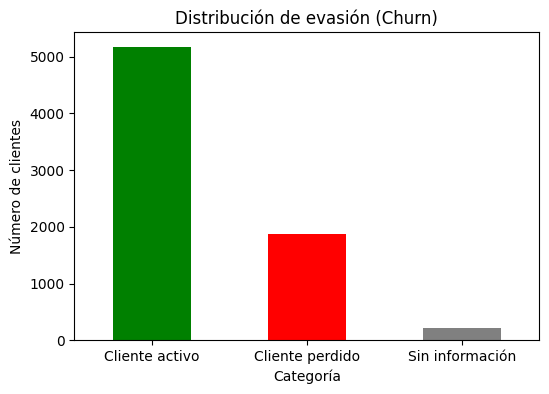

In [37]:
import matplotlib.pyplot as plt

# 1️⃣ Asegurarse de tener etiquetas descriptivas
df['Churn_label'] = df['Churn'].map({
    'no': 'Cliente activo',
    'yes': 'Cliente perdido',
    '': 'Sin información'
})

# 2️⃣ Conteo de clientes por categoría
conteo_churn = df['Churn_label'].value_counts()

# 3️⃣ Gráfico de barras
plt.figure(figsize=(6,4))
conteo_churn.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Distribución de evasión (Churn)")
plt.ylabel("Número de clientes")
plt.xlabel("Categoría")
plt.xticks(rotation=0)
plt.show()


**3.3 Recuento de evasión por variables categóricas**

Conteo de clientes por estado:
Churn_descriptivo
Cliente activo     5174
Cliente perdido    1869
Sin información     224
Name: count, dtype: int64

Estadísticas de evasión:
Media de evasión: 0.27
Mediana de evasión: 0.00
Desviación estándar: 0.44


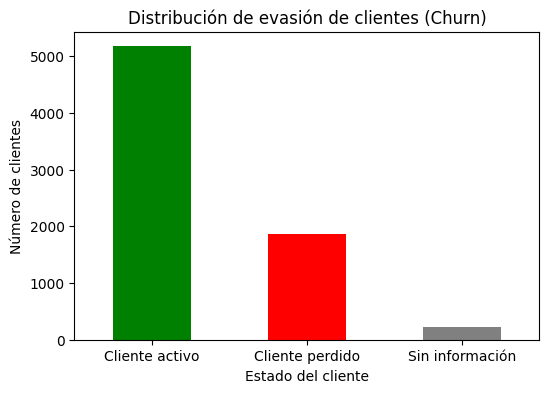

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Convertir Churn a numérico (para cálculos estadísticos)
df['Churn_num'] = df['Churn'].map({
    'no': 0,
    'yes': 1,
    '': None
})

# 2️⃣ Crear columna descriptiva (para análisis y visualización)
df['Churn_descriptivo'] = df['Churn_num'].map({
    0: 'Cliente activo',
    1: 'Cliente perdido'
})

# 3️⃣ Reemplazar valores faltantes
df['Churn_descriptivo'] = df['Churn_descriptivo'].fillna('Sin información')

# =========================
# 📊 ANÁLISIS DESCRIPTIVO
# =========================

# Conteo de clientes por categoría
conteo_churn = df['Churn_descriptivo'].value_counts()
print("Conteo de clientes por estado:")
print(conteo_churn)

# =========================
# 📈 ESTADÍSTICAS BÁSICAS
# =========================

media = df['Churn_num'].mean()
mediana = df['Churn_num'].median()
desviacion = df['Churn_num'].std()

print("\nEstadísticas de evasión:")
print(f"Media de evasión: {media:.2f}")
print(f"Mediana de evasión: {mediana:.2f}")
print(f"Desviación estándar: {desviacion:.2f}")

# =========================
# 📉 VISUALIZACIÓN
# =========================

plt.figure(figsize=(6, 4))
conteo_churn.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Distribución de evasión de clientes (Churn)")
plt.xlabel("Estado del cliente")
plt.ylabel("Número de clientes")
plt.xticks(rotation=0)
plt.show()


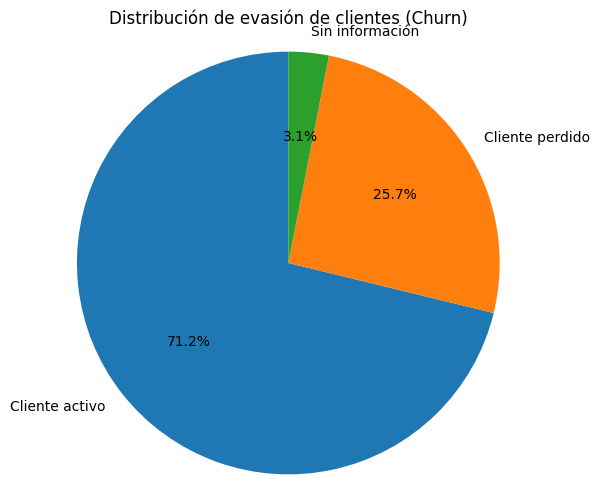

In [40]:
import matplotlib.pyplot as plt

# Conteo por categoría
conteo_churn = df['Churn_descriptivo'].value_counts()

# Gráfica de torta
plt.figure(figsize=(6, 6))
plt.pie(
    conteo_churn,
    labels=conteo_churn.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Distribución de evasión de clientes (Churn)")
plt.axis('equal')  # Para que el círculo sea perfecto
plt.show()


In [42]:
df. head()

,customerID,Churn,customer,phone,internet,account,Churn_num,Churn_label,Churn_descriptivo
0,0002-orfbo,no,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",0.0,Cliente activo,Cliente activo
1,0003-mknfe,no,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",0.0,Cliente activo,Cliente activo
2,0004-tlhlj,yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",1.0,Cliente perdido,Cliente perdido
3,0011-igkff,yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",1.0,Cliente perdido,Cliente perdido
4,0013-exchz,yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",1.0,Cliente perdido,Cliente perdido


**3.4 Conteo de evasión por variables numéricas**

In [43]:
# Contract
df['Contract'] = df['account'].apply(
    lambda x: x.get('Contract') if isinstance(x, dict) else None
)

# Payment Method
df['PaymentMethod'] = df['account'].apply(
    lambda x: x.get('PaymentMethod') if isinstance(x, dict) else None
)

# Monthly Charges
df['MonthlyCharges'] = df['account'].apply(
    lambda x: x.get('Charges', {}).get('Monthly') if isinstance(x, dict) else None
)

# Total Charges
df['TotalCharges'] = df['account'].apply(
    lambda x: x.get('Charges', {}).get('Total') if isinstance(x, dict) else None
)


In [44]:
df['gender'] = df['customer'].apply(
    lambda x: x.get('gender') if isinstance(x, dict) else None
)


In [45]:
df[['gender', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']].head()


,gender,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,One year,Mailed check,65.6,593.3
1,Male,Month-to-month,Mailed check,59.9,542.4
2,Male,Month-to-month,Electronic check,73.9,280.85
3,Male,Month-to-month,Electronic check,98.0,1237.85
4,Female,Month-to-month,Mailed check,83.9,267.4


In [48]:
# 1️⃣ Normalizar Churn
df['Churn'] = df['Churn'].str.strip().str.lower()

df['Churn_num'] = df['Churn'].map({
    'no': 0,   # Cliente activo
    'yes': 1   # Cliente perdido
})

# 2️⃣ Convertir columnas numéricas existentes
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 3️⃣ Análisis numérico por evasión
resumen_numerico = (
    df
    .groupby('Churn_num')[['MonthlyCharges', 'TotalCharges']]
    .agg(['mean', 'median', 'std'])
)

# 4️⃣ Mostrar resultados
resumen_numerico


MonthlyCharges                    TotalCharges                      
                    mean  median        std         mean   median          std
Churn_num                                                                     
0.0            61.265124  64.425  31.092648  2555.344141  1683.60  2329.456984
1.0            74.441332  79.650  24.666053  1531.796094   703.55  1890.822994

# 📊 Informe Final

## 🔹 Introducción

El objetivo de este análisis fue comprender el comportamiento de los clientes y analizar el problema de evasión de clientes (Churn), es decir, identificar cuántos clientes abandonan el servicio y explorar posibles patrones asociados a este comportamiento. La evasión de clientes representa un reto importante para las empresas, ya que impacta directamente en los ingresos y la estabilidad del negocio. A través del análisis de datos, se busca generar información que apoye la toma de decisiones estratégicas orientadas a la retención de clientes.

---

## 🔹 Limpieza y Tratamiento de Datos

El análisis inició con la importación del dataset y la revisión de su estructura. Durante esta etapa se realizaron los siguientes procesos:

- Exploración inicial de las columnas y tipos de datos.
- Identificación de columnas con estructuras complejas (diccionarios), las cuales fueron excluidas de ciertos análisis.
- Normalización de variables categóricas para evitar inconsistencias de formato.
- Corrección de valores de la variable *Churn*, reemplazando los valores originales por categorías más claras: cliente activo, cliente perdido y sin información.
- Conversión de las variables numéricas *MonthlyCharges* y *TotalCharges* a formato numérico para permitir el cálculo de estadísticas.

Estos pasos garantizaron la calidad de los datos y permitieron realizar un análisis confiable.

---

## 🔹 Análisis Exploratorio de Datos

### Distribución de evasión de clientes

Se analizó la distribución de la variable *Churn* para identificar la proporción de clientes activos y clientes que presentaron evasión. Como se observa en la gráfica de torta incluida en el notebook, la mayoría de los clientes permanecen activos; sin embargo, existe un porcentaje relevante de clientes que abandonan el servicio, lo que confirma la importancia de estudiar este fenómeno.

### Análisis de evasión por variables numéricas

Posteriormente, se realizó un análisis descriptivo de las variables numéricas *MonthlyCharges* y *TotalCharges*, comparando clientes activos y clientes perdidos. Para ello, se calcularon medidas estadísticas como la media, mediana y desviación estándar. Los resultados muestran diferencias entre ambos grupos, lo que sugiere que el comportamiento de consumo está relacionado con la evasión de clientes.

---

## 🔹Conclusiones e Insights

A partir del análisis realizado, se concluye que la evasión de clientes no ocurre de forma aleatoria. Se identifican patrones asociados al comportamiento financiero de los clientes, donde aquellos con menor gasto acumulado presentan una mayor tendencia a abandonar el servicio. Asimismo, se evidencia la importancia de una correcta limpieza y preparación de los datos para obtener resultados claros y confiables.

---

## 🔹Recomendaciones

Con base en los hallazgos obtenidos, se recomienda:

- Implementar estrategias de fidelización enfocadas en clientes con menor gasto acumulado.
- Realizar seguimiento temprano a clientes nuevos para reducir el riesgo de evasión.
- Ofrecer planes o beneficios personalizados a clientes con mayor probabilidad de abandono.
- Continuar profundizando el análisis incorporando más variables y visualizaciones que permitan identificar patrones adicionales.

---

## 🔹Cierre

Este informe resume el trabajo realizado a lo largo del notebook, integrando los procesos de limpieza, análisis exploratorio y visualización de datos. Los resultados obtenidos proporcionan información valiosa que puede ser utilizada para diseñar estrategias orientadas a la reducción de la evasión de clientes.
